## Challenge: Predict delays in MTO orders at the time of order release

### Business and Context:
* Titan is today one of the country’s most admired and valued companies. Established in 1987 as a Joint Venture between the Tata Group and Tamil Nadu Industrial Development Corporation (TIDCO), Titan has transformed itself from being one of the world’s largest integrated watch manufacturer to a premier lifestyle Company with a presence in the jewellery, watches, fragrances, eyewear and Indian dress wear segments, with an enviable distribution footprint. Tanishq, Titan&#39;s flagship line of jewellery, started its journey in 1994, challenging the established family jeweller system prevalent in India. Over the years, it has evolved into one of the finest jewellery brands, synonymous with exquisite craftsmanship and superlative quality. Today, Tanishq sells jewellery through a retail network of over 300 stores.

### 1. Importing the required libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

### 2. Importing the given dataset 

In [31]:
demo= pd.read_excel('Data for Case Study B - Predicting Delays.xlsx')

In [32]:
demo

,Promised Month,Region Head Code,Vendor Region,IsOrderForCustomerOccasion,Plain Gold or Studded Jewellery,Retail Region,OrderRefNo,Prod_Source,Karatage,Design Reference,Product Category,Product Size Code,Ord_Qty,Modification Type,Product description,Lead time (days),Delayed order
0,Apr,16,1 - IH-Hosur,Yes,PLAIN,WEST,ABKP2122P172O,Inhouse,18 KT / GOLD,P223PPY,PENDANT,A,1,New Design,GOLD PLAIN,34.0,Ontime
1,Apr,12,14- Secundrabad,No,PLAIN,WEST,ABKP2122P173,Outsourced,22 KT / GOLD,2019SHN,STUD EAR RING,A,1,Minor,GOLD PLAIN,19.0,Ontime
2,Apr,13,3 - Mumbai,No,PLAIN,WEST,ABKP2122P174,Outsourced,22 KT / GOLD,2017YPX,MANGAL SUTRA,M,1,Standard,GOLD PLAIN,22.0,Ontime
3,Apr,17,8 - Kolkata,No,PLAIN,WEST,ABKP2122P175,Outsourced,22 KT / GOLD,2219VMR,BANGLE,R,1,Standard,PLAIN WITH STONES,18.0,Ontime
4,Apr,12,13- Coimbatore,No,PLAIN,WEST,ABKP2122P176,Outsourced,22 KT / GOLD,D1D1DYD,DROP EAR RING,A,1,Standard,CZ PRODUCT,16.0,Ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151862,Mar,10,NaN,No,PLAIN,NORTH,YNRP2223P367,Outsourced,22 KT / GOLD,3420GBN,CHIAN + PENDANT,G,1,Minor,GOLD PLAIN,21.0,Overdue
151863,Mar,10,7 - Jaipur,No,STUDDED,ZOYA,ZBLP2223S38P,Outsourced,ZOYA 22kt,CP19DAM,DROP EAR RING,A,1,Standard,KUNDAN PLKI STONES,28.0,Overdue
151864,Mar,18,1A - IH-Pantnagar,No,STUDDED,ZOYA,ZKCP2223S8A,Inhouse,ZOYA 18kt,ST21FAB,FINGER RING,P,1,Major,STUDDED SOLITAIRE,NaN,Overdue
151865,Mar,15,3 - Mumbai,No,STUDDED,ZOYA,ZMAP2223S27A,Outsourced,ZOYA 18kt,FL21VBF,BANGLE,C,1,Minor,GOLD STUDDED,47.0,Overdue


### 3. Data Preprocessing


In [33]:
demo.drop(['OrderRefNo','Prod_Source','Karatage','Design Reference','Product Category','Product Size Code','Modification Type','Product description','Vendor Region'], axis=1, inplace=True)

In [34]:
demo.head()

,Promised Month,Region Head Code,IsOrderForCustomerOccasion,Plain Gold or Studded Jewellery,Retail Region,Ord_Qty,Lead time (days),Delayed order
0,Apr,16,Yes,PLAIN,WEST,1,34.0,Ontime
1,Apr,12,No,PLAIN,WEST,1,19.0,Ontime
2,Apr,13,No,PLAIN,WEST,1,22.0,Ontime
3,Apr,17,No,PLAIN,WEST,1,18.0,Ontime
4,Apr,12,No,PLAIN,WEST,1,16.0,Ontime


In [35]:
demo.rename(columns = {'Promised Month':'PromisedMonth','Region Head Code':'RegionHeadCode','Vendor Region':'VendorRegion','Plain Gold or Studded Jewellery':'PlainGoldOrStuddedJewellery','Retail Region':'RetailRegion','Lead time (days)':'LeadTimeDays','Delayed order':'DelayedOrder'}, inplace = True)

In [36]:
demo.head()

,PromisedMonth,RegionHeadCode,IsOrderForCustomerOccasion,PlainGoldOrStuddedJewellery,RetailRegion,Ord_Qty,LeadTimeDays,DelayedOrder
0,Apr,16,Yes,PLAIN,WEST,1,34.0,Ontime
1,Apr,12,No,PLAIN,WEST,1,19.0,Ontime
2,Apr,13,No,PLAIN,WEST,1,22.0,Ontime
3,Apr,17,No,PLAIN,WEST,1,18.0,Ontime
4,Apr,12,No,PLAIN,WEST,1,16.0,Ontime


In [37]:
demo['DelayedOrder'] = demo['DelayedOrder'].str.title()

In [39]:
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12,}

In [40]:
delayed = {'Ontime': 1, 'Overdue':0}

In [41]:
demo['DelayedOrder'] = demo['DelayedOrder'].replace(delayed)

In [42]:
demo["PromisedMonth"] = demo["PromisedMonth"].replace(month_map)


In [49]:
demo.head()

,PromisedMonth,RegionHeadCode,Ord_Qty,LeadTimeDays,DelayedOrder
0,4,16,1,34.0,1
1,4,12,1,19.0,1
2,4,13,1,22.0,1
3,4,17,1,18.0,1
4,4,12,1,16.0,1


<Axes: xlabel='DelayedOrder', ylabel='count'>

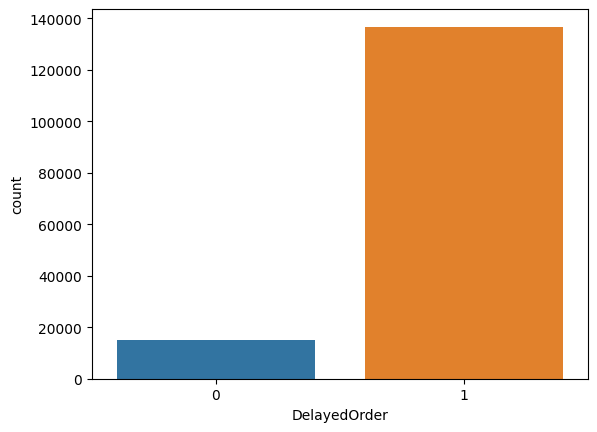

In [43]:
sns.countplot(x='DelayedOrder',data=demo)

In [44]:
demo.drop(['IsOrderForCustomerOccasion','PlainGoldOrStuddedJewellery','RetailRegion'], axis = 1, inplace = True)

In [45]:
demo.head()

,PromisedMonth,RegionHeadCode,Ord_Qty,LeadTimeDays,DelayedOrder
0,4,16,1,34.0,1
1,4,12,1,19.0,1
2,4,13,1,22.0,1
3,4,17,1,18.0,1
4,4,12,1,16.0,1


<Axes: xlabel='LeadTimeDays', ylabel='count'>

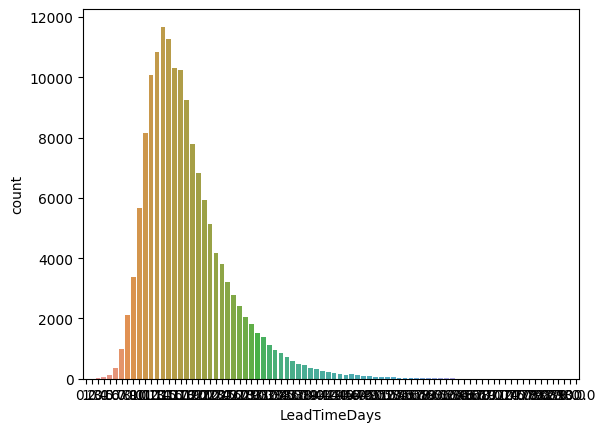

In [46]:
sns.countplot(x='LeadTimeDays',data=demo)

Text(0, 0.5, 'PromisedMonth')

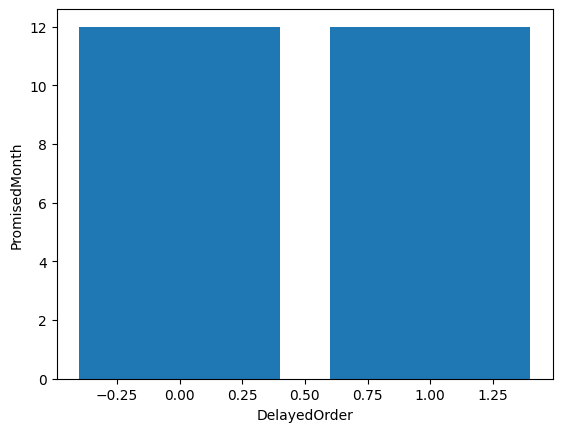

In [51]:
plt.bar(demo["DelayedOrder"], demo["PromisedMonth"])

# Add labels
plt.xlabel("DelayedOrder")
plt.ylabel("PromisedMonth")

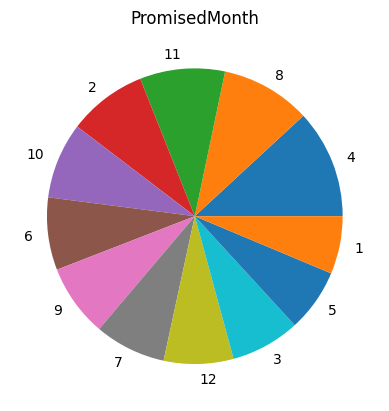

In [52]:
promised_month = demo["PromisedMonth"]

# Create a pie chart
plt.pie(promised_month.value_counts(), labels=promised_month.unique())

# Add labels to the pie chart
plt.title("PromisedMonth")
plt.show()

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
imputer.fit(demo)
X_imputed = imputer.transform(demo)


In [20]:
demo.isnull().sum()

PromisedMonth       0
RegionHeadCode      0
Ord_Qty             0
LeadTimeDays      798
DelayedOrder        0
dtype: int64

In [21]:
#filling the null values

demo.fillna(0, inplace=True)

In [22]:
demo.isnull().sum()

PromisedMonth     0
RegionHeadCode    0
Ord_Qty           0
LeadTimeDays      0
DelayedOrder      0
dtype: int64

In [23]:
#Splitting the data into feature and target data

features = demo[["PromisedMonth", "RegionHeadCode", "Ord_Qty", "LeadTimeDays"]]
target = demo["DelayedOrder"]


In [24]:
model = LogisticRegression()
model.fit(features, target)

LogisticRegression()

In [25]:
predictions = model.predict(features)

In [28]:
accuracy = np.mean(predictions == target)

In [29]:
print(accuracy)


0.9042846701390032
